# Typical Machine Learning NLP Workflow with PyTorch

1. Import your data 
2. Pre-process/clean your corpus (remove punctuation, etc..) if neccessary
2. If it is not tokenized, then tokenize (break into words)
3. In order to do batching, input should be of same length, because these models are usually not dynamic, so <PAD>
4. Define a mapping for the tokens
5. Map tokens to ints
6. Train-test-val split (if enough data)
7. Define and Train/validate your model
8. Test your model.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
slot_vocab = ['O',
 'PAD',
 'B-aircraft_code',
 'B-airline_code',
 'B-airline_name',
 'B-airport_code',
 'B-airport_name',
 'B-arrive_date.date_relative',
 'B-arrive_date.day_name',
 'B-arrive_date.day_number',
 'B-arrive_date.month_name',
 'B-arrive_date.today_relative',
 'B-arrive_time.end_time',
 'B-arrive_time.period_mod',
 'B-arrive_time.period_of_day',
 'B-arrive_time.start_time',
 'B-arrive_time.time',
 'B-arrive_time.time_relative',
 'B-booking_class',
 'B-city_name',
 'B-class_type',
 'B-compartment',
 'B-connect',
 'B-cost_relative',
 'B-day_name',
 'B-day_number',
 'B-days_code',
 'B-depart_date.date_relative',
 'B-depart_date.day_name',
 'B-depart_date.day_number',
 'B-depart_date.month_name',
 'B-depart_date.today_relative',
 'B-depart_date.year',
 'B-depart_time.end_time',
 'B-depart_time.period_mod',
 'B-depart_time.period_of_day',
 'B-depart_time.start_time',
 'B-depart_time.time',
 'B-depart_time.time_relative',
 'B-economy',
 'B-fare_amount',
 'B-fare_basis_code',
 'B-flight',
 'B-flight_days',
 'B-flight_mod',
 'B-flight_number',
 'B-flight_stop',
 'B-flight_time',
 'B-fromloc.airport_code',
 'B-fromloc.airport_name',
 'B-fromloc.city_name',
 'B-fromloc.state_code',
 'B-fromloc.state_name',
 'B-meal',
 'B-meal_code',
 'B-meal_description',
 'B-mod',
 'B-month_name',
 'B-or',
 'B-period_of_day',
 'B-restriction_code',
 'B-return_date.date_relative',
 'B-return_date.day_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-round_trip',
 'B-state_code',
 'B-state_name',
 'B-stoploc.airport_code',
 'B-stoploc.airport_name',
 'B-stoploc.city_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'B-toloc.airport_code',
 'B-toloc.airport_name',
 'B-toloc.city_name',
 'B-toloc.country_name',
 'B-toloc.state_code',
 'B-toloc.state_name',
 'B-transport_type',
 'BOS',
 'I-airline_name',
 'I-airport_name',
 'I-arrive_date.day_number',
 'I-arrive_time.end_time',
 'I-arrive_time.period_of_day',
 'I-arrive_time.start_time',
 'I-arrive_time.time',
 'I-arrive_time.time_relative',
 'I-city_name',
 'I-class_type',
 'I-cost_relative',
 'I-depart_date.day_number',
 'I-depart_date.today_relative',
 'I-depart_time.end_time',
 'I-depart_time.period_of_day',
 'I-depart_time.start_time',
 'I-depart_time.time',
 'I-depart_time.time_relative',
 'I-economy',
 'I-fare_amount',
 'I-fare_basis_code',
 'I-flight_mod',
 'I-flight_number',
 'I-flight_stop',
 'I-flight_time',
 'I-fromloc.airport_name',
 'I-fromloc.city_name',
 'I-fromloc.state_name',
 'I-meal_code',
 'I-meal_description',
 'I-restriction_code',
 'I-return_date.date_relative',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-round_trip',
 'I-state_name',
 'I-stoploc.city_name',
 'I-time',
 'I-today_relative',
 'I-toloc.airport_name',
 'I-toloc.city_name',
 'I-toloc.state_name',
 'I-transport_type',
 'EOS']

In [3]:
# 1 Import data
atis_sentences = [
             ['tpo','i','want','to','fly','from','baltimore','to','dallas','round','trip','end'],
             ['top','round','trip','fares','from','baltimore','to','philadelphia','less','than','1000','dollars','round','trip','fares','from',
              'denver','to','philadelphia','less','than','1000','dollars','round','trip','fares','from','pittsburgh','to','philadelphia','less',
              'than','1000','dollars','end']
             ]
atis_slots = [['BOS','O','O','O','O','O','B-fromloc.city_name','O','B-toloc.city_name','B-round_trip','I-round_trip','EOS'],
         ['BOS','B-round_trip','I-round_trip','O','O','B-fromloc.city_name','O','B-toloc.city_name','B-cost_relative',
 'O','B-fare_amount','I-fare_amount','B-round_trip','I-round_trip','O','O',
 'B-fromloc.city_name','O','B-toloc.city_name','B-cost_relative','O','B-fare_amount','I-fare_amount','B-round_trip',
 'I-round_trip','O','O','B-fromloc.city_name','O','B-toloc.city_name','B-cost_relative','O','B-fare_amount','I-fare_amount','EOS']
         ]

In [ ]:
# 2 Tokenize, above is already tokenized

In [4]:
# 3 PAD to maximum length OR you can truncate. Your choice
MAX_LEN = len(max(atis_sentences, key=len))

def pad_sequence(sentences,max_len=50):
  for i in range(len(sentences)):
    while len(sentences[i])<max_len:
      sentences[i].append('PAD')

pad_sequence(atis_sentences, max_len=MAX_LEN)
pad_sequence(atis_slots, max_len=MAX_LEN)

In [5]:
# 4 For mapping slots and intents between ints and string
slot2id = {slot:id for id,slot in enumerate(slot_vocab)}
id2slot = {id:slot for slot,id in slot2id.items()}

token2id = {}
counter = 0
for sentence in atis_sentences:
  for token in sentence:
    if token not in token2id:
      token2id[token] = counter
      counter+=1
id2token = {id:token for token,id in token2id.items()}

In [6]:
# 5 Mapping tokens to ints
def map_sequence(sequence, mapping):
  mapped_sequence = []
  for token in sequence:
    mapped_sequence.append(mapping[token])
  return mapped_sequence

def map_corpa(corpa, mapping):
  mapped_corpa = []
  for sequence in corpa:
    mapped_corpa.append(map_sequence(sequence, mapping))
  return mapped_corpa

mapped_sentences = map_corpa(atis_sentences,token2id)
mapped_slots = map_corpa(atis_slots, slot2id)

In [7]:
# Create Dataset class
class ATISDataset(Dataset):
  def __init__(self, X, y):
    # Convert arrays to torch tensors
    self.X = torch.tensor(X)
    self.y = torch.tensor(y)
  
  #Must have
  def __len__(self):
    return len(self.y)

  #Must have
  def __getitem__(self,index):
    return self.X[index], self.y[index]

In [8]:
# define dataset
atis_dataset = ATISDataset(X=mapped_sentences, y=mapped_slots)

# define a Dataloader
dataloader = DataLoader(dataset=atis_dataset, 
                        batch_size=1,#only 1 for this toy example
                        shuffle=True)

In [9]:
len(token2id)

# [book me a flight] -> [0 1 2 3] -> #get word2vec vectors -> [ [0 100dim], [1 100 dim].. etc]

20

In [17]:
# Define RNN + MLP taken from Yelp Review example
class Classifier(nn.Module):
    """ a RNN + multi-layered perceptron based classifier """
    def __init__(self, num_features,out_features):
        """
        Args:
            num_features (int): the size of the input feature vector
        """
        super(Classifier, self).__init__()
        self.emb = nn.Embedding(num_embeddings=len(token2id),
                                embedding_dim=num_features)
        
        self.rnn = nn.RNN(num_features,hidden_size=num_features)
        self.fc1 = nn.Linear(in_features=num_features, 
                             out_features=64)
        self.fc2 = nn.Linear(in_features=64, 
                             out_features=32)
        self.fc3 = nn.Linear(in_features=32, 
                             out_features=16)
        self.fc4 = nn.Linear(in_features=16,
                             out_features=out_features)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, num_features)
            apply_softmax (bool): a flag for the sigmoid activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch,)
        """
        y_out = self.emb(x_in)
        y_out,_ = self.rnn(y_out)
        y_out = torch.relu(self.fc1(y_out))
        y_out = torch.relu(self.fc2(y_out))
        y_out = torch.relu(self.fc3(y_out))
        y_out = self.fc4(y_out)#.squeeze(0)
        if apply_softmax:
            y_out = torch.softmax(y_out)
        return y_out

In [18]:
cuda = torch.cuda.is_available()
print("Using CUDA: {}".format(cuda))

device = torch.device("cuda" if cuda else "cpu")

Using CUDA: True


In [19]:
# 6 Train-test-val split but not enough data :(

# 7 Define and set up train loop
# Training hyper parameters
learning_rate=0.001
num_epochs=100


clf = Classifier(num_features=MAX_LEN,out_features=len(slot2id))
clf.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=learning_rate)

In [20]:
losses = []
for epoch in range(num_epochs):
  epoch_loss = 0
  for X,y in dataloader:
    # the training routine is these 5 steps:
    X = X.to(device)
    y = y.to(device)
    # print(X)
    # print(y)
    # --------------------------------------
    # step 1. zero the gradients
    optimizer.zero_grad()

    # step 2. compute the output
    y_pred = clf(X.long())

    # step 3. compute the loss
    # print(y.size())
    # print(y_pred.size())
    loss = loss_func(y_pred.squeeze(0), y.squeeze(0))
    epoch_loss+= loss.item()
    
    # step 4. use loss to produce gradients
    loss.backward()

    # step 5. use optimizer to take gradient step
    optimizer.step()
  # -----------------------------------------
  losses.append(epoch_loss)

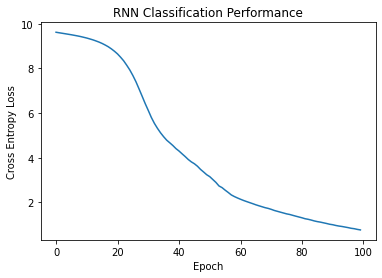

In [21]:
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('RNN Classification Performance')
plt.plot(losses)

In [22]:
# 8 Testing 
test_input = torch.tensor(mapped_sentences[0]).unsqueeze(0).long().to(device)
clf.eval()
sm_weights = torch.softmax(clf(test_input),dim=0)
pred = torch.argmax(sm_weights,dim=2).squeeze(0).cpu().numpy()
pred = map_sequence(
    pred,
    id2slot)
def accuracy(pred, truth):
  measurements = []
  for p,t in zip(pred,truth):
    measurements.append(pred==truth)
  return np.mean(measurements)
accuracy(pred, atis_slots[0])

0.0

In [23]:
pred

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']